 # Heart Attack Prediction

# Preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
heart = pd.read_csv('C:/Datasett/heart attack/heart.csv')
heart.sample(9)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
107,45,0,0,138,236,0,0,152,1,0.2,1,0,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
74,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1


In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart.loc[heart.caa == 4, 'caa']

92     4
158    4
163    4
164    4
251    4
Name: caa, dtype: int64

In [5]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart.duplicated().sum()

1

In [7]:
heart.drop_duplicates(inplace=True)

In [8]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### We observe the column "caa" has 4 entries with the value 4 is outside the range, so replace it with the mode of this features

In [9]:
mode = int(heart['caa'].mode().values)
heart.loc[heart.caa == 4, 'caa'] = mode
heart.caa.value_counts()

0    179
1     65
2     38
3     20
Name: caa, dtype: int64

In [10]:
thal = int(heart.thall.mode().values)
heart[heart.thall == 0] = thal
heart['thall'].value_counts()

2    167
3    117
1     18
Name: thall, dtype: int64

In [11]:
sex = int(heart['sex'].mode().values)
heart[heart['sex'] == 2] = sex
heart['sex'].value_counts()

1    207
0     95
Name: sex, dtype: int64

# Data Visualization

## Age

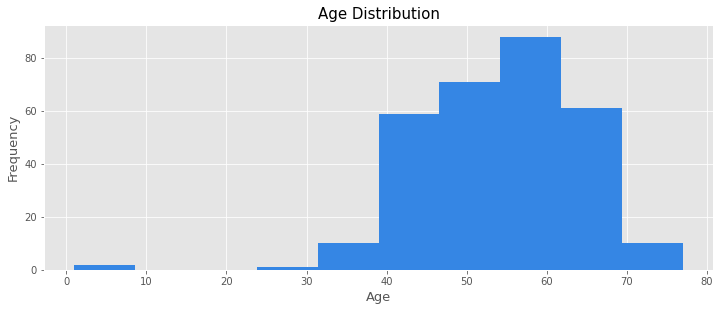

In [12]:
plt.figure(figsize = (12,4.5))
plt.hist(heart['age'], color = np.random.rand(3,))
plt.ylabel('Frequency', fontsize = 13)
plt.xlabel('Age', fontsize = 13)
plt.title('Age Distribution', size = 15)

plt.show()

## Sex

<AxesSubplot:xlabel='sex', ylabel='count'>

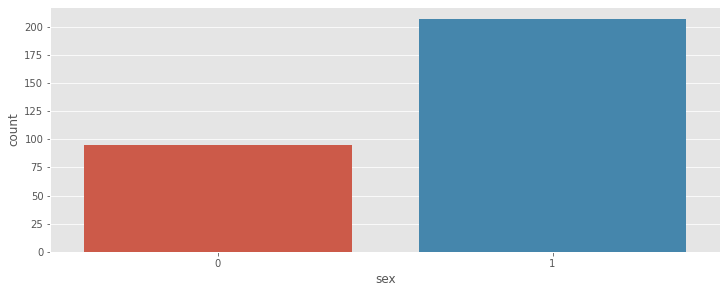

In [13]:
plt.figure(figsize = (12,4.5 ))
sns.countplot(heart['sex'])

0 represents "Female" and 1 represents "Male"

## Types of chest pain

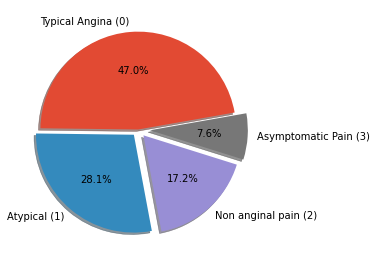

In [14]:
X       = heart['cp'].value_counts()
explode = [0,0.07,0.08,0.12]
labels  = ['Typical Angina (0)', 'Atypical (1)', 'Non anginal pain (2)', 'Asymptomatic Pain (3)']

plt.figure(figsize = (12,4.5))
plt.pie(X, labels =labels, explode = explode, autopct='%1.1f%%', startangle = 10, shadow=True)
plt.show()

## Find outliers

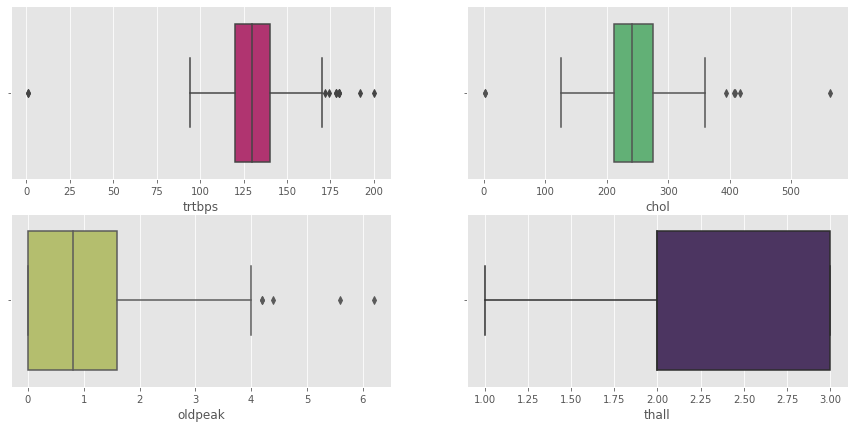

In [15]:
fig, ax = plt.subplots(2,2, figsize = (15,7))

sns.boxplot(heart['trtbps'], ax=ax[0,0], color = np.random.rand(3,))
sns.boxplot(heart['chol'],ax=ax[0,1],color = np.random.rand(3,))
sns.boxplot(heart['oldpeak'],ax=ax[1,0],color = np.random.rand(3,))
sns.boxplot(heart['thall'],ax=ax[1,1],color = np.random.rand(3,))

plt.show()

In [16]:
print('Total raw before dropping outliers :', len(heart))

filtered_entries = np.array([False]*len(heart))
for col in ['thall','oldpeak','trtbps','chol']:
    q1  = heart[col].quantile(0.25)
    q3  = heart[col].quantile(0.75)
    iqr = q3 - q1
    low_limit  = q1 - iqr*(1.5)
    high_limit = q3 + iqr*(1.5)
    
    filtered_entries = ((heart[col] < low_limit) |( heart[col] > high_limit)) | filtered_entries

heart1 = heart[~filtered_entries]

print("Total raw after dropping outliers : ", len(heart1))
heart1

Total raw before dropping outliers : 302
Total raw after dropping outliers :  282


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
ex = heart1.skew().to_frame().sort_values(0).reset_index()
e  = np.array(ex[ex[0]>0.5]['index'].values).tolist()
f  = np.array(ex[ex[0]<-0.5]['index'].values).tolist()
for i in f:
    e.append(i)

In [30]:
a_dictionary = {}
for number in e:
    a_dictionary["%s" %number] = MinMaxScaler().fit_transform(heart1['%s'%number].values.reshape(-1,1)).flatten()
a_dictionary = pd.DataFrame(a_dictionary)

<AxesSubplot:xlabel='thalachh', ylabel='Density'>

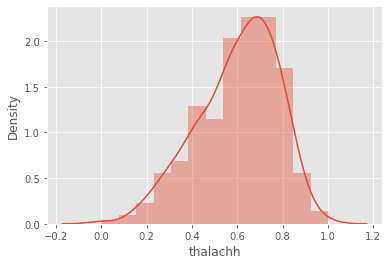

In [36]:
heart2 = heart1.reset_index(drop=True).drop(e, axis=1)
heart3 = pd.concat([heart2,a_dictionary], axis=1)
sns.distplot(heart3.thalachh)

In [38]:
heart3

,age,cp,trtbps,chol,restecg,thall,output,exng,oldpeak,caa,fbs,sex,thalachh,slp
0,63,3,145,233,0,1,1,0.0,0.575,0.000000,1.0,1.0,0.603053,0.0
1,37,2,130,250,1,2,1,0.0,0.875,0.000000,0.0,1.0,0.885496,0.0
2,41,1,130,204,0,2,1,0.0,0.350,0.000000,0.0,0.0,0.770992,1.0
3,56,1,120,236,1,2,1,0.0,0.200,0.000000,0.0,1.0,0.816794,1.0
4,57,0,120,354,1,2,1,1.0,0.150,0.000000,0.0,0.0,0.702290,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,57,0,140,241,1,3,0,1.0,0.050,0.000000,0.0,0.0,0.396947,0.5
278,45,3,110,264,1,3,0,0.0,0.300,0.000000,0.0,1.0,0.465649,0.5
279,68,0,144,193,1,3,0,0.0,0.850,0.666667,1.0,1.0,0.534351,0.5
280,57,0,130,131,1,3,0,1.0,0.300,0.333333,0.0,1.0,0.335878,0.5


# Modelling

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [79]:
X = heart3.drop('output',axis=1)
y = heart3['output']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## DT

In [100]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
from sklearn.metrics import accuracy_score, classification_report
dt_pred = dt.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Accuracy:  0.7543859649122807
              precision    recall  f1-score   support

           0       0.72      0.78      0.75        27
           1       0.79      0.73      0.76        30

    accuracy                           0.75        57
   macro avg       0.75      0.76      0.75        57
weighted avg       0.76      0.75      0.75        57



## RF

In [102]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
rf_pred = rf.predict(X_test)
print('Accuracy :', accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Accuracy : 0.8947368421052632
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.93      0.87      0.90        30

    accuracy                           0.89        57
   macro avg       0.90      0.90      0.89        57
weighted avg       0.90      0.89      0.89        57



## SVC

In [104]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [105]:
svc_pred = svc.predict(X_test)
print('Accuracy :', accuracy_score(y_test, svc_pred))
print(classification_report(y_test, svc_pred))

Accuracy : 0.5263157894736842
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.53      1.00      0.69        30

    accuracy                           0.53        57
   macro avg       0.26      0.50      0.34        57
weighted avg       0.28      0.53      0.36        57



## Logistic Regression

In [106]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [107]:
lr_pred = lr.predict(X_test)
print('Accuracy :', accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

Accuracy : 0.8947368421052632
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        27
           1       0.93      0.87      0.90        30

    accuracy                           0.89        57
   macro avg       0.90      0.90      0.89        57
weighted avg       0.90      0.89      0.89        57



## KNN

In [108]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [109]:
knn_pred = knn.predict(X_test)
print('Accuracy :', accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

Accuracy : 0.5263157894736842
              precision    recall  f1-score   support

           0       0.50      0.52      0.51        27
           1       0.55      0.53      0.54        30

    accuracy                           0.53        57
   macro avg       0.53      0.53      0.53        57
weighted avg       0.53      0.53      0.53        57



## Gradient Boosting

In [110]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [111]:
gbc_pred = gbc.predict(X_test)
print('Accuracy :', accuracy_score(y_test, gbc_pred))
print(classification_report(y_test, gbc_pred))

Logistic Regression and Random Forest are higher than other algorithm. So, use one of those to predict the next data